In [ ]:
import os

os.system("git clone https://github.com/ifanzilka/ft_neural_network_lib")
import sys
sys.path.append('/content/ft_neural_network_lib/V2') # ADD Directory with my Lib


In [ ]:
# Подключаю библиотеки
from network import *
from train   import *

In [ ]:
### распознование рукописных цифр mnist
import numpy as np
from urllib import request
import gzip
import pickle

filename = [
["training_images","train-images-idx3-ubyte.gz"],
["test_images","t10k-images-idx3-ubyte.gz"],
["training_labels","train-labels-idx1-ubyte.gz"],
["test_labels","t10k-labels-idx1-ubyte.gz"]
]


def download_mnist():
    base_url = "http://yann.lecun.com/exdb/mnist/"
    for name in filename:
        print("Downloading "+name[1]+"...")
        request.urlretrieve(base_url+name[1], name[1])
    print("Download complete.")


def save_mnist():
    mnist = {}
    for name in filename[:2]:
        with gzip.open(name[1], 'rb') as f:
            mnist[name[0]] = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1,28*28)
    for name in filename[-2:]:
        with gzip.open(name[1], 'rb') as f:
            mnist[name[0]] = np.frombuffer(f.read(), np.uint8, offset=8)
    with open("mnist.pkl", 'wb') as f:
        pickle.dump(mnist,f)
    print("Save complete.")


def init():
    download_mnist()
    save_mnist()


def load():
    with open("mnist.pkl",'rb') as f:
        mnist = pickle.load(f)
    return mnist["training_images"], mnist["training_labels"], mnist["test_images"], mnist["test_labels"]

init()
X_train, y_train, X_test, y_test = load()
num_labels = len(y_train)
num_labels



# one-hot encode
num_labels = len(y_train)
train_labels = np.zeros((num_labels, 10))
for i in range(num_labels):
    train_labels[i][y_train[i]] = 1

num_labels = len(y_test)
test_labels = np.zeros((num_labels, 10))
for i in range(num_labels):
    test_labels[i][y_test[i]] = 1

Download complete.
Save complete.


In [ ]:
def calc_accuracy_model(model, test_set):
    return print(f'''The model validation accuracy is: {np.equal(np.argmax(model.forward(test_set), axis=1), y_test).sum() * 100.0 / test_set.shape[0]:.2f}%''')

In [ ]:
#  Делам нейронку для цифр
model = NeuralNetwork(
    layers=[Dense(neurons=89, 
                  activation=Tanh()),
            Dense(neurons=10, 
                  activation=Sigmoid())],
            loss = MeanSquaredError(normalize=False), 
seed=20190119)

trainer = Trainer(model, SGD(0.1))
trainer.fit(X_train, train_labels, X_test, test_labels,
            epochs = 50,
            eval_every = 10,
            seed=20190119,
            batch_size=60)
print()
calc_accuracy_model(model, X_test)

Validation loss after 10 epochs is 0.776
Validation loss after 20 epochs is 0.700
Validation loss after 30 epochs is 0.658
Validation loss after 40 epochs is 0.620
Validation loss after 50 epochs is 0.564

The model validation accuracy is: 53.08%


In [ ]:
# Теперь сначала делаем среднее 0 и стандартное отклонение 1

# делаем Мат Ожидание  = 0
X_train_1, X_test_1 = X_train - np.mean(X_train), X_test - np.mean(X_train)
np.min(X_train_1), np.max(X_train_1), np.min(X_test_1), np.max(X_test_1)

# Делаем чтобы стандартное отклонение было = 1

X_train_1, X_test_1 = X_train_1 / np.std(X_train_1), X_test_1 / np.std(X_train_1)



In [ ]:
#  Делам нейронку для цифр
model = NeuralNetwork(
    layers=[Dense(neurons=89, 
                  activation=Tanh()),
            Dense(neurons=10, 
                  activation=Sigmoid())],
            loss = MeanSquaredError(normalize=False), 
seed=20190119)

trainer = Trainer(model, SGD(0.1))
trainer.fit(X_train_1, train_labels, X_test_1, test_labels,
            epochs = 50,
            eval_every = 10,
            seed=20190119,
            batch_size=60)
print()
calc_accuracy_model(model, X_test_1)

Validation loss after 10 epochs is 0.611
Validation loss after 20 epochs is 0.427
Validation loss after 30 epochs is 0.389
Validation loss after 40 epochs is 0.373
Validation loss after 50 epochs is 0.365

The model validation accuracy is: 72.67%


In [ ]:
#  Делам нейронку для цифр , другая ошибка 

model = NeuralNetwork(
    layers=[Dense(neurons=89, 
                  activation=Sigmoid()),
            Dense(neurons=10, 
                  activation=Linear())],
            loss = SoftmaxCrossEntropy(), 
seed=20190119)

trainer = Trainer(model, SGD(0.1))
trainer.fit(X_train, train_labels, X_test, test_labels,
            epochs = 50,
            eval_every = 1,
            seed=20190119,
            batch_size=60);
print()
calc_accuracy_model(model, X_test)

/content/ft_neural_network_lib/V2/activations.py:36: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0+np.exp(-1.0 * self.input_))


Validation loss after 1 epochs is 1.613
Validation loss after 2 epochs is 1.225
Validation loss after 3 epochs is 1.125
Validation loss after 4 epochs is 1.056
Validation loss after 5 epochs is 1.001
Validation loss after 6 epochs is 0.936
Validation loss after 7 epochs is 0.901
Validation loss after 8 epochs is 0.881
Validation loss after 9 epochs is 0.858
Loss increased after epoch 10, final loss was 0.858, using the model from epoch 9

The model validation accuracy is: 84.23%


In [ ]:
#  Делам нейронку для цифр , другая ошибка  уже отнормированные

model = NeuralNetwork(
    layers=[Dense(neurons=89, 
                  activation=Sigmoid()),
            Dense(neurons=10, 
                  activation=Linear())],
            loss = SoftmaxCrossEntropy(), 
seed=20190119)

trainer = Trainer(model, SGD(0.1))
trainer.fit(X_train_1, train_labels, X_test_1, test_labels,
            epochs = 50,
            eval_every = 1,
            seed=20190119,
            batch_size=60);
print()
calc_accuracy_model(model, X_test_1)

Validation loss after 1 epochs is 1.285
Validation loss after 2 epochs is 0.970
Validation loss after 3 epochs is 0.836
Validation loss after 4 epochs is 0.763
Validation loss after 5 epochs is 0.712
Validation loss after 6 epochs is 0.679
Validation loss after 7 epochs is 0.651
Validation loss after 8 epochs is 0.631
Validation loss after 9 epochs is 0.617
Validation loss after 10 epochs is 0.599
Validation loss after 11 epochs is 0.588
Validation loss after 12 epochs is 0.576
Validation loss after 13 epochs is 0.568
Validation loss after 14 epochs is 0.557
Validation loss after 15 epochs is 0.550
Validation loss after 16 epochs is 0.544
Validation loss after 17 epochs is 0.537
Validation loss after 18 epochs is 0.533
Validation loss after 19 epochs is 0.529
Validation loss after 20 epochs is 0.523
Validation loss after 21 epochs is 0.517
Validation loss after 22 epochs is 0.512
Validation loss after 23 epochs is 0.507
Loss increased after epoch 24, final loss was 0.507, using the mod

6


/content/ft_neural_network_lib/V2/activations.py:36: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0+np.exp(-1.0 * self.input_))


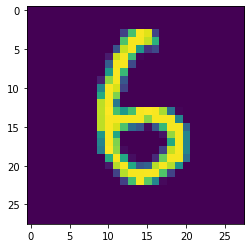

In [23]:
n = 21

print(np.argmax(model.forward(X_test[n])))

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.imshow(X_test[n].reshape(28,28))